# Import Important Libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Read Data

In [191]:
df=pd.read_csv("C:/Users/lab11/.jupyter/Churn-Prediction-in-Telecom-Industry-using-Logistic-Regression/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
df.shape

(7043, 21)

In [195]:
df.duplicated().sum()

0

In [196]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

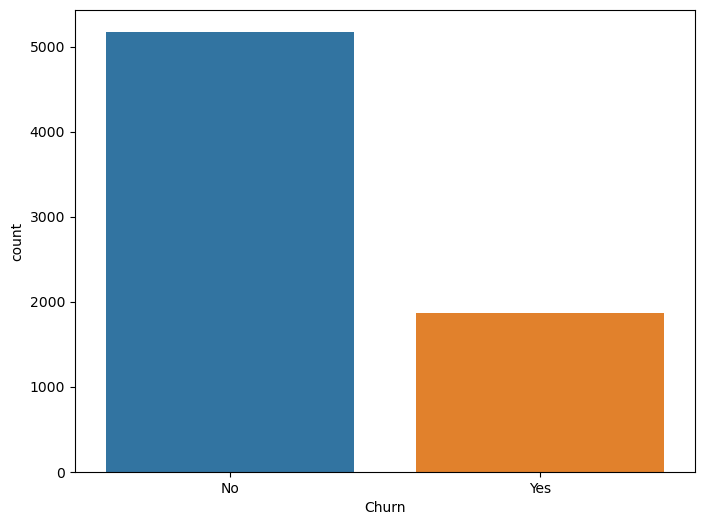

In [197]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.Churn)
plt.show()

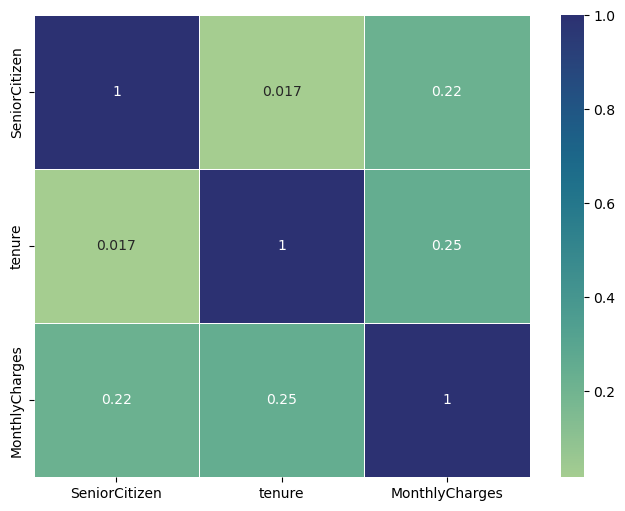

In [198]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="crest", linewidth=.5,annot=True)
plt.show()

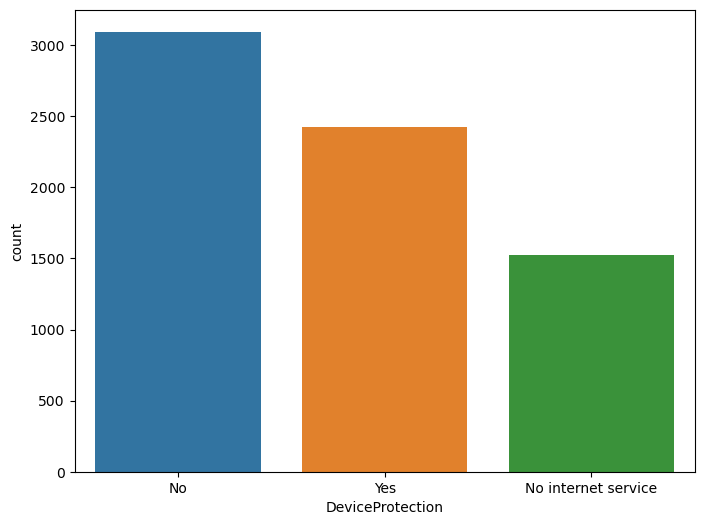

In [199]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.DeviceProtection)
plt.show()

In [200]:
from sklearn.preprocessing import LabelEncoder

# Sample categorical data
categorical_data = [
    "gender",
    "Partner", 
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'TotalCharges',
    'Churn'
                   ]    


In [201]:
label_encoder = LabelEncoder()

for i in range(len(categorical_data)):

    df[categorical_data[i]] = label_encoder.fit_transform(df[categorical_data[i]])

In [202]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


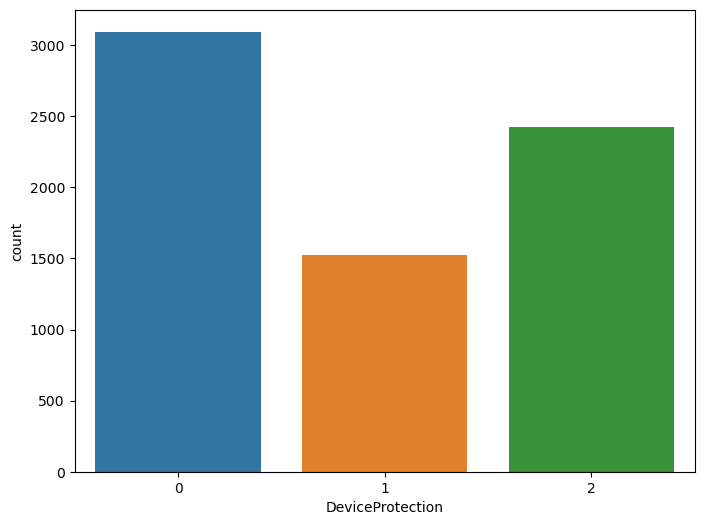

In [203]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.DeviceProtection)
plt.show()

In [204]:
X=df.drop(columns={"customerID","Churn"})
y=df['Churn']

In [205]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000 )
RFE_feature=RFE(estimator=model,n_features_to_select=15,step=1)#estimator, n_features_to_select=5, step=1
X_new=RFE_feature.fit_transform(X,y)

In [206]:
X_new

array([[  0.  ,   0.  ,   0.  , ...,   1.  ,   2.  ,  29.85],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   3.  ,  56.95],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   3.  ,  53.85],
       ...,
       [  0.  ,   0.  ,   1.  , ...,   1.  ,   2.  ,  29.6 ],
       [  1.  ,   1.  ,   0.  , ...,   1.  ,   3.  ,  74.4 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   0.  , 105.65]])

In [207]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_new=sc.fit_transform(X_new)


In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=.20)

In [209]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [210]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)
y_pred_proba.shape

(1409, 2)

In [211]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f} %")


Accuracy: 80.62 %


In [213]:
from sklearn.metrics  import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [214]:
cm=confusion_matrix(y_test,y_pred)

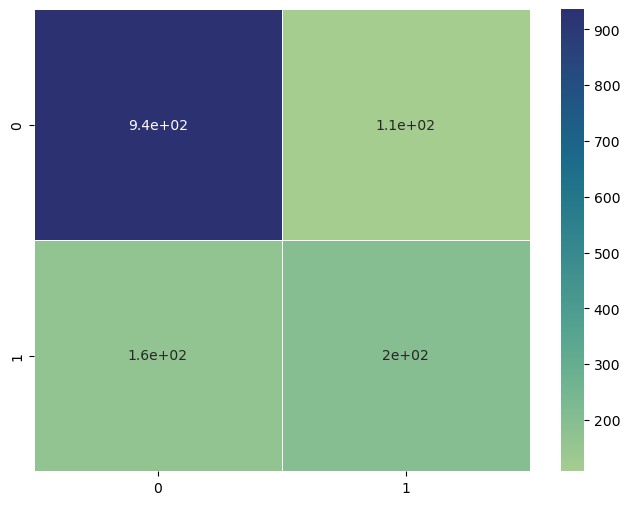

In [215]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap="crest", linewidth=.5,annot=True)
plt.show()

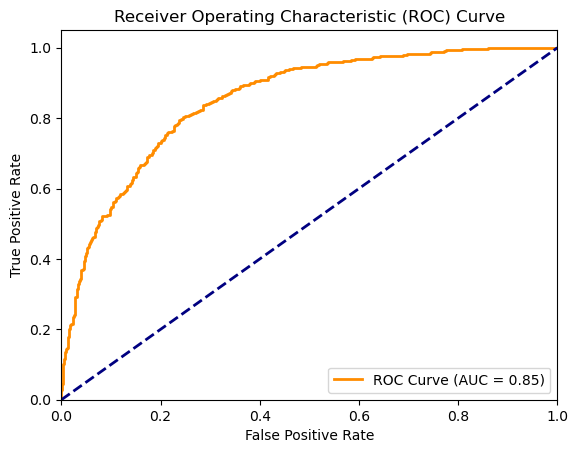

In [216]:
y_pred_proba_positive =y_pred_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_positive)
roc_auc = roc_auc_score(y_test, y_pred_proba_positive)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


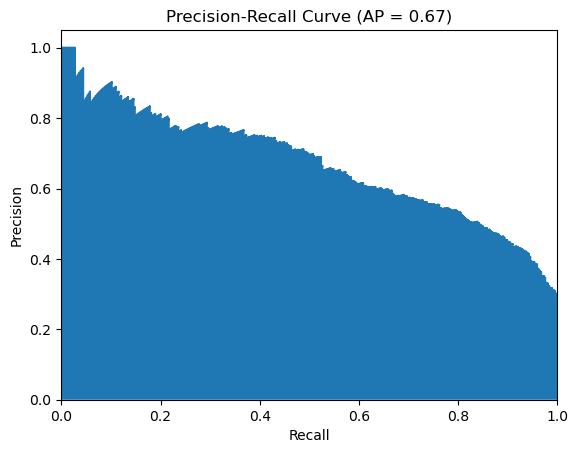

In [223]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_positive)

average_precision = average_precision_score(y_test, y_pred_proba_positive)

plt.figure()
plt.step(recall, precision)
plt.fill_between(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()

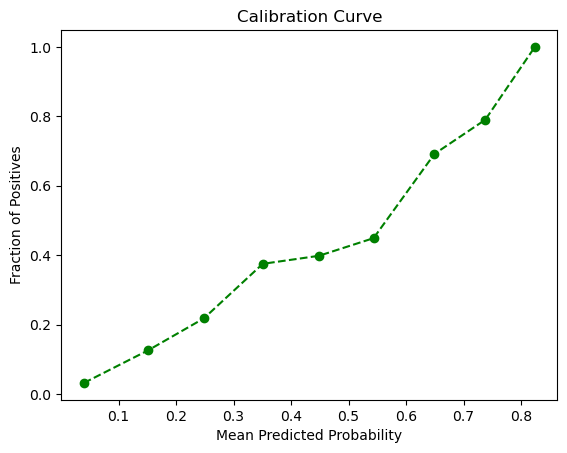

In [224]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

y_pred_proba_positive = y_pred_proba[:, 1]

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_positive, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', color='green')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.show()
